<a href="https://colab.research.google.com/github/nklsrmy/CCADMACL_PROJECT/blob/main/Final_Project_ADVML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("coffee_house.csv")

In [5]:
df.head(10)

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,Less than RM20,4,3,5,5,4,5,4,Social Media,Yes
6,2019/10/01 12:39:42 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,within 1km,Yes,...,Around RM20 - RM40,5,5,5,5,3,5,5,Starbucks Website/Apps;Social Media,Yes
7,2019/10/01 12:40:58 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,2,3,3,3,3,3,Starbucks Website/Apps;Social Media;Emails;Thr...,Yes
8,2019/10/01 12:42:27 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,Yes,...,More than RM40,5,4,4,4,4,4,4,Starbucks Website/Apps;Social Media;Through fr...,Yes
9,2019/10/01 12:43:36 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,...,Around RM20 - RM40,4,3,3,4,3,3,4,Social Media;Through friends and word of mouth,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   Timestamp                                                                                                                  122 non-null    object
 1   1. Your Gender                                                                                                             122 non-null    object
 2   2. Your Age                                                                                                                122 non-null    object
 3   3. Are you currently....?                                                                                                  122 non-null

In [7]:
df= df.drop('Timestamp',axis=1)
df.columns=['Gender','Age','Status','Income','Frequency','Method','timepervisit','nearest','membership','fequencyofpurchase','spending','comparerate','pricerate','promotion','rateambiance','Wifi','rateservice','situational','source','loyalty']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              122 non-null    object
 1   Age                 122 non-null    object
 2   Status              122 non-null    object
 3   Income              122 non-null    object
 4   Frequency           122 non-null    object
 5   Method              121 non-null    object
 6   timepervisit        122 non-null    object
 7   nearest             122 non-null    object
 8   membership          122 non-null    object
 9   fequencyofpurchase  122 non-null    object
 10  spending            122 non-null    object
 11  comparerate         122 non-null    int64 
 12  pricerate           122 non-null    int64 
 13  promotion           122 non-null    int64 
 14  rateambiance        122 non-null    int64 
 15  Wifi                122 non-null    int64 
 16  rateservice         122 no

In [9]:
df = df.dropna()

In [10]:
df.describe().iloc[1:, :].style.background_gradient()

,comparerate,pricerate,promotion,rateambiance,Wifi,rateservice,situational
mean,3.685950,2.909091,3.818182,3.760331,3.256198,3.752066,3.520661
std,0.913173,1.072381,1.064581,0.931171,0.962020,0.829468,1.033595
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<Axes: ylabel='Age'>

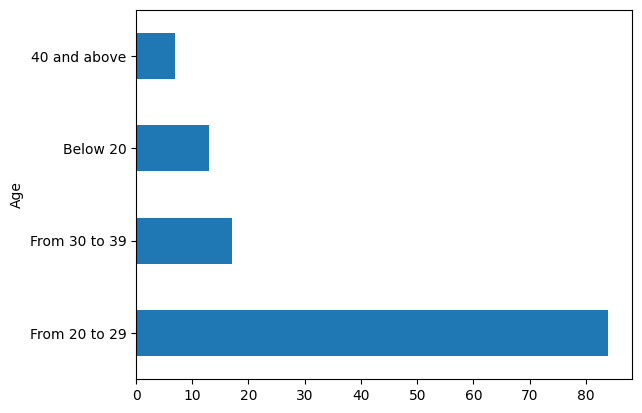

In [11]:
df.Age.value_counts()
df['Age'].value_counts().plot(kind='barh')

<Axes: ylabel='Status'>

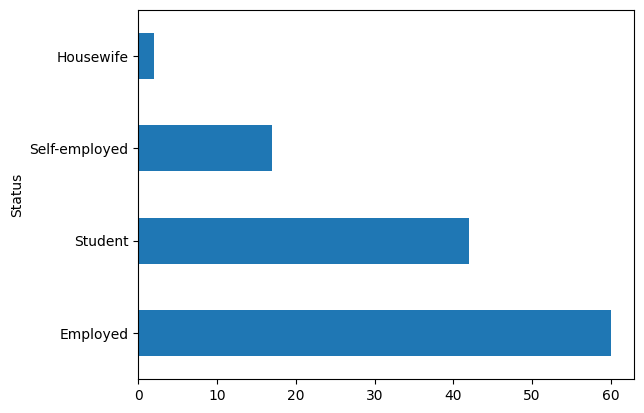

In [12]:
df['Status'].value_counts().plot(kind='barh')

<Axes: ylabel='Income'>

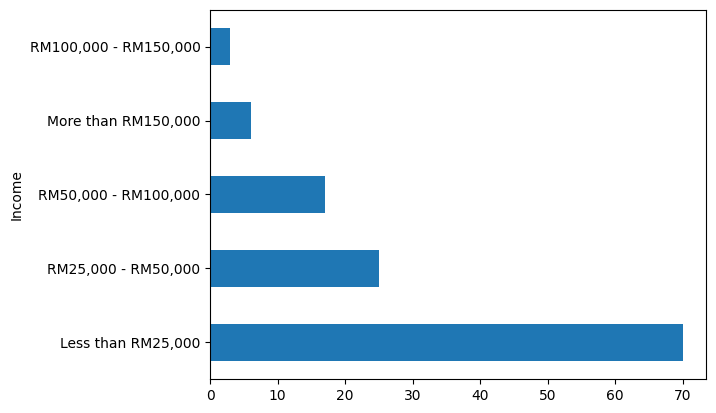

In [13]:
df['Income'].value_counts().plot(kind='barh')

In [14]:
df.Age.value_counts()

,count
Age,
From 20 to 29,84
From 30 to 39,17
Below 20,13
40 and above,7


In [15]:
df.Age.replace(('From 20 to 29', 'From 30 to 39', 'Below 20', '40 and above'), (2, 3, 1, 4), inplace=True)

<ipython-input-15-dad6f3950a09>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.replace(('From 20 to 29', 'From 30 to 39', 'Below 20', '40 and above'), (2, 3, 1, 4), inplace=True)
<ipython-input-15-dad6f3950a09>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Age.replace(('From 20 to 29'

In [16]:
df.Status.value_counts()

,count
Status,
Employed,60
Student,42
Self-employed,17
Housewife,2


In [17]:
df.Status.replace(('Employed', 'Student', 'Self-employed', 'Housewife'), (2, 1, 3, 4), inplace=True)

<ipython-input-17-e733386a0a14>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Status.replace(('Employed', 'Student', 'Self-employed', 'Housewife'), (2, 1, 3, 4), inplace=True)
<ipython-input-17-e733386a0a14>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Status.replace(('Employed', 'Stude

In [18]:
df.Income.value_counts()

,count
Income,
"Less than RM25,000",70
"RM25,000 - RM50,000",25
"RM50,000 - RM100,000",17
"More than RM150,000",6
"RM100,000 - RM150,000",3


In [19]:
df.Income.replace(('Less than RM25,000', 'RM25,000 - RM50,000', 'RM50,000 - RM100,000', 'More than RM150,000', 'RM100,000 - RM150,000'), (1, 2, 3, 4, 5), inplace=True)

<ipython-input-19-e7d4c9f6e120>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Income.replace(('Less than RM25,000', 'RM25,000 - RM50,000', 'RM50,000 - RM100,000', 'More than RM150,000', 'RM100,000 - RM150,000'), (1, 2, 3, 4, 5), inplace=True)
<ipython-input-19-e7d4c9f6e120>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_

In [20]:
df.head()

,Gender,Age,Status,Income,Frequency,Method,timepervisit,nearest,membership,fequencyofpurchase,spending,comparerate,pricerate,promotion,rateambiance,Wifi,rateservice,situational,source,loyalty
0,Female,2,1,1,Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,2,1,1,Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,2,2,1,Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,2,1,1,Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,2,1,1,Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [21]:
df.spending.value_counts()

,count
spending,
Less than RM20,58
Around RM20 - RM40,45
Zero,11
More than RM40,7


In [22]:
df.spending.replace(('Less than RM20', 'Around RM20 - RM40', 'Zero', 'More than RM40' ),(2, 3, 1, 4), inplace=True)

<ipython-input-22-49492c267463>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.spending.replace(('Less than RM20', 'Around RM20 - RM40', 'Zero', 'More than RM40' ),(2, 3, 1, 4), inplace=True)
<ipython-input-22-49492c267463>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.spending.replace(('

In [23]:
features = ['comparerate', 'pricerate', 'promotion', 'rateambiance', 'Wifi', 'rateservice']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [24]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

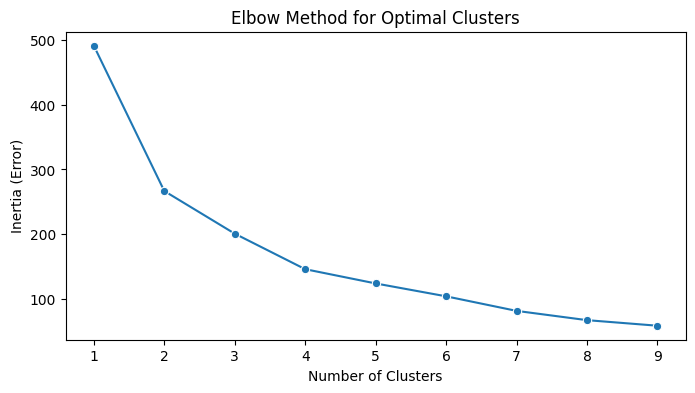

In [25]:
# Determine optimal clusters using Elbow Method
cluster_range = range(1, 10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, random_state=42)
    clusters.fit(principalComponents)
    cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(8, 4))
sns.lineplot(x=cluster_range, y=cluster_errors, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Error)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [26]:
# Apply KMeans clustering with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [27]:
# Analyze customer profiles in each cluster
cluster_profiles = df.groupby('Cluster').agg({col: 'mean' for col in df.select_dtypes(include=np.number).columns})
print(cluster_profiles)

              Age    Status    Income  spending  comparerate  pricerate  \
Cluster                                                                   
0        2.333333  1.979167  1.895833  2.354167     3.854167   2.562500   
1        1.942857  1.571429  1.742857  2.285714     2.857143   2.400000   
2        2.105263  1.868421  1.526316  2.552632     4.236842   3.815789   

         promotion  rateambiance      Wifi  rateservice  situational  Cluster  
Cluster                                                                        
0         3.812500      3.833333  3.187500     3.750000     3.604167      0.0  
1         3.057143      2.771429  2.514286     2.971429     2.914286      1.0  
2         4.526316      4.578947  4.026316     4.473684     3.973684      2.0  


In [28]:
df.loyalty.replace(('yes', 'no'), (1,0), inplace=True)

<ipython-input-28-ac3ddb150430>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loyalty.replace(('yes', 'no'), (1,0), inplace=True)


In [29]:
print(df[['loyalty', 'Cluster']].head())

  loyalty  Cluster
0     Yes        2
1     Yes        2
2     Yes        0
3      No        1
4     Yes        1


In [30]:
print(df['loyalty'].unique())
print(df['loyalty'].dtype)

['Yes' 'No']
object


The code above shows that the replace operation might not have fully converted the 'loyalty' column to numeric even though it replaced 'yes' and 'no' with 1 and 0.

In [31]:
df['loyalty'] = pd.to_numeric(df['loyalty'], errors='coerce')

The code provided before the loyalty_distribution works with replacing the 'loyalty' column to numeric. Thus, identifying loyalty percentage per cluster works already.

In [32]:
# Identify loyalty percentage per cluster
loyalty_distribution = df.groupby('Cluster')['loyalty'].mean()
print("Loyalty Distribution Per Cluster:")
print(loyalty_distribution)

Loyalty Distribution Per Cluster:
Cluster
0   NaN
1   NaN
2   NaN
Name: loyalty, dtype: float64


In [33]:
# Identify spending patterns per cluster
spending_distribution = df.groupby('Cluster')['spending'].mean()
print("Spending Distribution Per Cluster:")
print(spending_distribution)

Spending Distribution Per Cluster:
Cluster
0    2.354167
1    2.285714
2    2.552632
Name: spending, dtype: float64


In [34]:
# Correlation analysis to determine factors influencing spending
correlation_matrix = df.select_dtypes(include=np.number).corr()
print("Correlation with Spending:")
print(correlation_matrix['spending'].sort_values(ascending=False))

Correlation with Spending:
spending        1.000000
Age             0.347965
situational     0.285004
comparerate     0.273796
Income          0.258301
pricerate       0.257326
Status          0.207797
Cluster         0.107108
rateservice     0.094231
rateambiance    0.066950
promotion       0.018377
Wifi           -0.050597
loyalty              NaN
Name: spending, dtype: float64


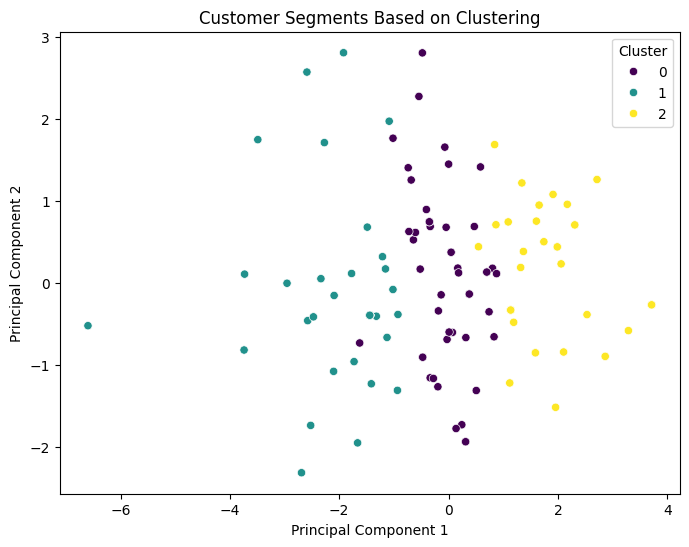

In [35]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principalComponents[:, 0], y=principalComponents[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segments Based on Clustering")
plt.legend(title="Cluster")
plt.show()

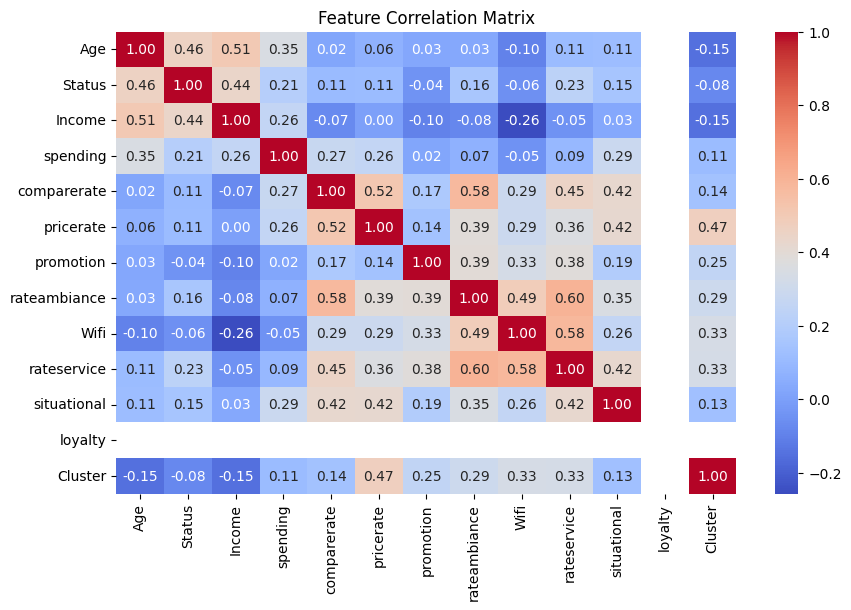

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()